<a href="https://colab.research.google.com/github/aureliodeboa/Deep-Learning/blob/main/REsidenciaInstagram_influencers_EDA%2C_statistical(Atividade_Complementar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style='background:#00FFFF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>TOP INSTAGRAM INFLUENCERS DATA</center></h1>

<img src = "https://i.gifer.com/9uhG.gif" width = 900 height = 400/>

Sobre este arquivo:

Neste arquivo, basicamente há 10 atributos. Ele foi ordenado com base na classificação que foi decidida com base em "seguidores".

rank: Classificação do Influenciador com base no número de seguidores que ele tem

channel_info: Nome de usuário do Instagrammer

influence score: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

posts: Número de posts que eles fizeram até agora

followers: Número de seguidores do usuário

avg_likes: Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

60_day_eng_rate: Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

new_post_avg_like: Média de curtidas que eles têm em novos posts

total de curtidas: Total de curtidas que o usuário obteve em seus posts. (em bilhões)

country: País ou região de origem do usuário.
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:

!gdown '1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i'

Downloading...
From: https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i
To: /content/top_insta_influencers_data.csv
100% 12.6k/12.6k [00:00<00:00, 18.2MB/s]


In [3]:
dataset = pd.read_csv('top_insta_influencers_data.csv')
## Visualize as primeiras linhas do DataFrame
dataset.head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [4]:
#Vamos renomear as colunas para facilitar a interpretação
dataset.rename(columns={'rank':'Classificação'}, inplace=True)
dataset.rename(columns={'channel_info': 'Nome'}, inplace=True)
dataset.rename(columns={'influence_score': 'Pontuação'}, inplace=True)
dataset.rename(columns={'posts': 'Postagens'}, inplace=True)
dataset.rename(columns={'followers': 'Seguidores'}, inplace=True)
dataset.rename(columns={'avg_likes': 'Media_Curtidas'}, inplace=True)
dataset.rename(columns={'60_day_eng_rate': 'Taxa_Engajamento'}, inplace=True)
dataset.rename(columns={'new_post_avg_like': 'Media_Curtidas_Novas'}, inplace=True)
dataset.rename(columns={'total_likes': 'Likes'}, inplace=True)
dataset.rename(columns={'country': 'País'}, inplace=True)

<a id="title-two"></a>
<h1 style='background:#00FFFF; border:2; border-radius: 3
px; color:black'><center>Visualize todas as informações
do DataFrame
 </center></h1>

In [5]:

dataset

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


Atividade 1: Análise Inicial dos Dados

In [6]:
# 1. Exibir as primeiras 10 linhas do DataFrame

dataset.head(-10)

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
185,186,paollaoliveirareal,84,4.6k,34.7m,367.8k,0.57%,192.3k,1.7b,NaN
186,187,blakelively,80,0.11k,34.6m,3.1m,0.02%,0,350.9m,United States
187,188,adidasoriginals,83,0.15k,34.2m,136.2k,0.20%,66.8k,21.2m,NaN
188,189,disney,77,7.3k,34.2m,185.2k,0.44%,132.0k,1.4b,United States


In [7]:
# 2. Obter um resumo das estatísticas descritivas das colunas numéricas
dataset.describe()

,Classificação,Pontuação
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [8]:
# 3. Verificar se há valores ausentes em alguma coluna
dataset.isnull().sum()


,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,0
Media_Curtidas_Novas,0
Likes,0
País,62


In [9]:
#4.visualização dos nomes das colunas
dataset.columns

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')

In [41]:
analise_insta = pd.DataFrame()

# Aplicar a função à coluna "Seguidores"
analise_insta['Influenciador'] = dataset['Nome']
analise_insta['Classificação'] = dataset['Classificação']

def convert_postagens(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        if 'm' in value:
            return float(value.replace('m', '')) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1000000000
        else:
            return float(value)  # Caso não tenha 'm', 'k' ou 'b'
    else:
        return value  # Se já for numérico, retorna o valor como está

# Aplicar a função às colunas relevantes
analise_insta['Postagens'] = dataset['Postagens'].apply(convert_postagens)
analise_insta['Seguidores'] = dataset['Seguidores'].apply(convert_postagens)
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas'].apply(convert_postagens)
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas'].apply(convert_postagens)
analise_insta['Pontuação'] = dataset['Pontuação'].apply(convert_postagens)
analise_insta["Taxa_Engajamento"] = dataset["Taxa_Engajamento"].replace("%", "", regex=True)
analise_insta["Taxa_Engajamento"] = analise_insta["Taxa_Engajamento"].astype(float) / 100

analise_insta['País'] = dataset['País']

print(analise_insta)


    Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0       cristiano              1     3300.0  475800000.0       8700000.0   
1     kyliejenner              2     6900.0  366200000.0       8300000.0   
2        leomessi              3      890.0  357300000.0       6800000.0   
3     selenagomez              4     1800.0  342700000.0       6200000.0   
4         therock              5     6800.0  334100000.0       1900000.0   
..            ...            ...        ...          ...             ...   
195     iambeckyg            196     2300.0   33200000.0        623800.0   
196    nancyajram            197     3800.0   33200000.0        390400.0   
197   luansantana            198      770.0   33200000.0        193300.0   
198     nickjonas            199     2300.0   33000000.0        719600.0   
199     raisa6690            200     4200.0   32800000.0        232200.0   

     Media_Curtidas_Novas  Pontuação  Taxa_Engajamento           País  
0              

In [11]:
# 1. Calcular a média, mediana e desvio padrão do número de seguidores
analise_insta['Seguidores'].describe()

,Seguidores
count,2.000000e+02
mean,7.740950e+07
std,7.368727e+07
min,3.280000e+07
25%,4.000000e+07
50%,5.005000e+07
75%,6.890000e+07
max,4.758000e+08


In [12]:
# 2. Encontre o influenciador com o maior número de seguidores e o que tem o menor número de seguidores
influenciador_mais_seguidores = analise_insta.loc[analise_insta['Seguidores'].idxmax()]
influenciador_menos_seguidores = analise_insta.loc[analise_insta['Seguidores'].idxmin()]
print("Influenciador com o maior número de seguidores:")
print(influenciador_mais_seguidores)
print("\nInfluenciador com o menor número de seguidores:")
print(influenciador_menos_seguidores)

Influenciador com o maior número de seguidores:
Influenciador             cristiano
Classificação                     1
Postagens                    3300.0
Seguidores              475800000.0
Media_Curtidas            8700000.0
Media_Curtidas_Novas      6500000.0
Taxa_Engajamento             0.0139
País                          Spain
Name: 0, dtype: object

Influenciador com o menor número de seguidores:
Influenciador            raisa6690
Classificação                  200
Postagens                   4200.0
Seguidores              32800000.0
Media_Curtidas            232200.0
Media_Curtidas_Novas       97400.0
Taxa_Engajamento             0.003
País                     Indonesia
Name: 199, dtype: object


In [13]:
# 3. Determine o número total de posts feitos por todos os influenciadores
analise_insta['Postagens'].sum()

699970.0

Atividade 3: Visualização de Dados


Text(0.5, 0, 'Influenciador')

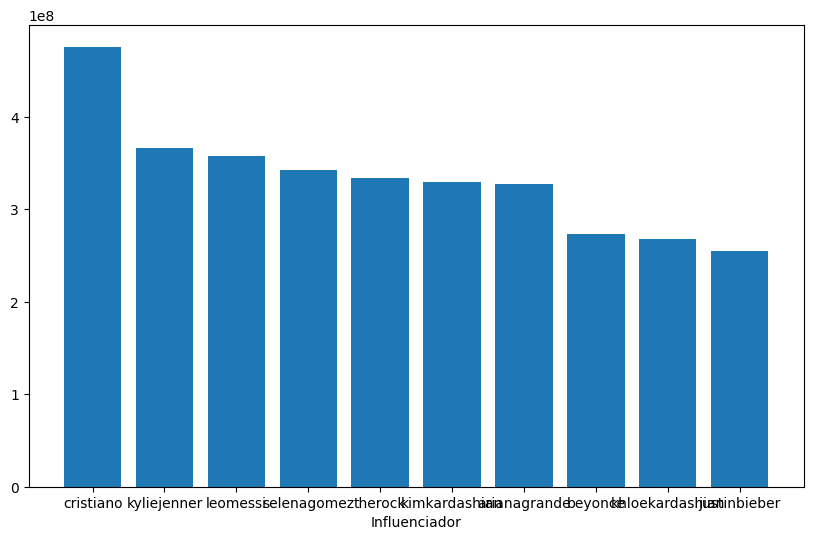

In [14]:
# 1. Criar um gráfico de barras mostrando o número de seguidores dos 10 principais influenciadores
plt.figure(figsize=(10,6))
plt.bar(analise_insta['Influenciador'].head(10), analise_insta['Seguidores'].head(10))
plt.xlabel('Influenciador')

Text(0, 0.5, 'Postagens')

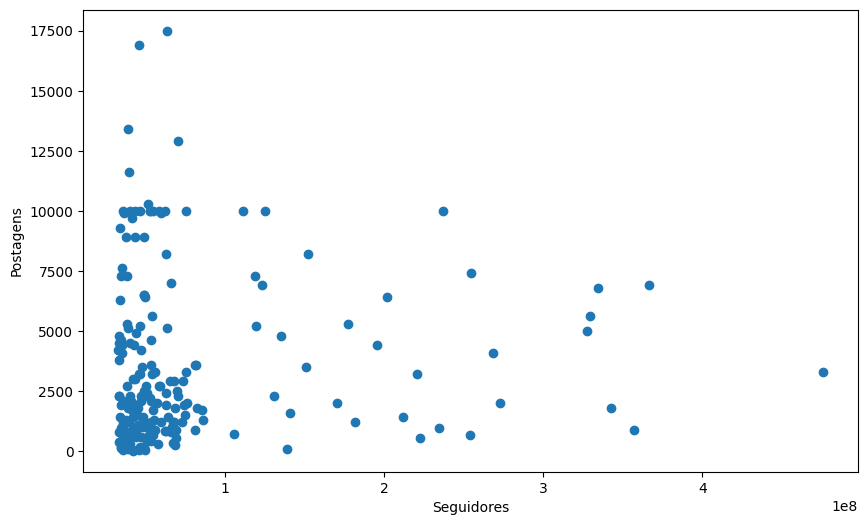

In [15]:
# 2. Plotar um gráfico de dispersão mostrando a relação entre o número de seguidores e o número de posts
plt.figure(figsize=(10,6))
plt.scatter(analise_insta['Seguidores'], analise_insta['Postagens'])
plt.xlabel('Seguidores')
plt.ylabel('Postagens')


Text(0, 0.5, 'Frequência')

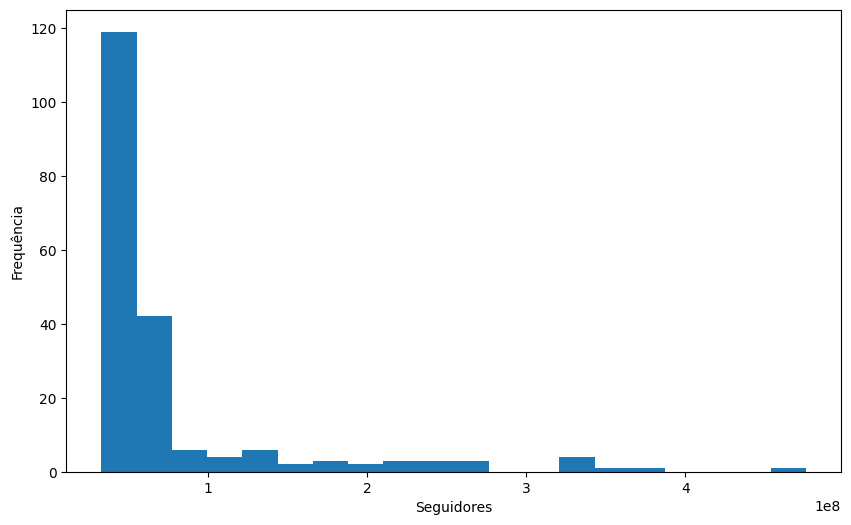

In [16]:
# 3. Criar um histograma para visualizar a distribuição dos números de seguidores
plt.figure(figsize=(10,6))
plt.hist(analise_insta['Seguidores'], bins=20)
plt.xlabel('Seguidores')
plt.ylabel('Frequência')

Atividade 4: Manipulação de Dados


In [17]:
# 1. Criar uma nova coluna que classifique os influenciadores em "Micro", "Macro" e "Mega"

def classificar_influenciador(seguidores):
    if seguidores < 4.000000e+07:
        return "Micro"
    elif 4.000000e+07 <= seguidores <= 5.005000e+07:
        return "Macro"
    else:
        return "Mega"

analise_insta['Classificação_Influenciador'] = analise_insta['Seguidores'].apply(classificar_influenciador)
print(analise_insta)
# 2. Encontre a média do número de seguidores para cada categoria de influenciador

print("Média de seguidores por categoria:")
print(analise_insta.groupby('Classificação_Influenciador')['Seguidores'].mean())
# 3. Agrupar os dados por categoria de influenciador e calcular a soma total dos posts para cada categoria

soma_posts_por_categoria = analise_insta.groupby('Classificação_Influenciador')['Postagens'].sum()
print("\nSoma total de postagens por categoria:")
print(soma_posts_por_categoria)

    Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0       cristiano              1     3300.0  475800000.0       8700000.0   
1     kyliejenner              2     6900.0  366200000.0       8300000.0   
2        leomessi              3      890.0  357300000.0       6800000.0   
3     selenagomez              4     1800.0  342700000.0       6200000.0   
4         therock              5     6800.0  334100000.0       1900000.0   
..            ...            ...        ...          ...             ...   
195     iambeckyg            196     2300.0   33200000.0        623800.0   
196    nancyajram            197     3800.0   33200000.0        390400.0   
197   luansantana            198      770.0   33200000.0        193300.0   
198     nickjonas            199     2300.0   33000000.0        719600.0   
199     raisa6690            200     4200.0   32800000.0        232200.0   

     Media_Curtidas_Novas  Taxa_Engajamento           País  \
0               6500000.0

Atividade 5: Proporção

In [18]:
#1.Qual é a proporção de influenciadores que possuem uma taxa de engajamento nos últimos 60 dias superior a 5%?

# Converter 'Taxa_Engajamento' column to numeric
#já Esta graças a função do começo



# 2. Calcular a proporção de influenciadores com taxa de engajamento superior a 5%
influenciadores_alta_taxa = analise_insta[analise_insta['Taxa_Engajamento'] > 0.05]
proporcao_alta_taxa = len(influenciadores_alta_taxa) / len(analise_insta)

# Exibir a proporção
print(f"Proporção de influenciadores com taxa de engajamento superior a 5%: {proporcao_alta_taxa:.5%}")

Proporção de influenciadores com taxa de engajamento superior a 5%: 9.00000%


In [19]:
# Filtrar os influenciadores com taxa de engajamento superior a 5%
quantidade = analise_insta[analise_insta['Taxa_Engajamento'] > 0.05].copy()  # Criar uma cópia explícita

# Multiplicar a taxa de engajamento por 100 usando .loc[]
quantidade.loc[:, 'Taxa_Engajamento'] = quantidade['Taxa_Engajamento'] * 100

# Ordenar o DataFrame pela taxa de engajamento
quantidade = quantidade.sort_values(by='Taxa_Engajamento', ascending=False)

# Imprimir os influenciadores e suas respectivas taxas de engajamento
print(quantidade[['Influenciador', 'Taxa_Engajamento']])

# Quantidade de influenciadores
print(f"Quantidade de influenciadores com taxa de engajamento superior a 5%: {len(quantidade)}")


          Influenciador  Taxa_Engajamento
140                 j.m             26.41
102                 thv             25.80
138          badbunnypr             13.09
53       tomholland2013             10.83
78               karolg             10.25
69      roses_are_rosie              9.72
64            sooyaaa__              9.43
38         lalalalisa_m              9.00
118                zayn              8.81
75     milliebobbybrown              8.63
156         georginagio              8.56
49       jennierubyjane              8.36
83             zacefron              8.18
114         harrystyles              6.38
120         travisscott              5.71
56   bts.bighitofficial              5.40
177     kimberly.loaiza              5.23
32         billieeilish              5.02
Quantidade de influenciadores com taxa de engajamento superior a 5%: 18


In [29]:
#2.Qual a proporção de influenciadores cujo número de seguidores representa mais de 10% do total de seguidores de
#todos os influenciadores juntos?
total = analise_insta['Seguidores'].sum()
print(total)
analise_insta.sort_values(by='Seguidores', ascending=False)
analise_insta.head()
influenciadores_10 = analise_insta[analise_insta['Seguidores'] >( 0.1 * total)]
proporcao_10 = len(influenciadores_10) / len(analise_insta)
print(f"Proporção de influenciadores com mais de 10% dos seguidores: {proporcao_10:.5%}")

15481900000.0
Proporção de influenciadores com mais de 10% dos seguidores: 0.00000%


In [35]:
#3.Qual é a proporção de influenciadores que possuem uma média de curtidas em novos posts superior à média de
#curtidas em todos os seus posts?
media_curitdas_total = analise_insta['Media_Curtidas_Novas'].mean()
influenciadores_topcurtidas = analise_insta[analise_insta['Media_Curtidas_Novas'] > media_curitdas_total]
proporcao_topcurtidas = len(influenciadores_topcurtidas) / len(analise_insta)
print(f"Proporção de influenciadores com média de curtidas em novos posts superior à média de curtidas em todos os seus posts: {proporcao_topcurtidas:.5%}")

Proporção de influenciadores com média de curtidas em novos posts superior à média de curtidas em todos os seus posts: 26.50000%


In [42]:
#4.Qual a proporção de influenciadores que têm um "influence score" maior do que a média do "influence score"
# de todo o banco de dados?
analise_insta.head()

media_influence_score_total= analise_insta['Pontuação'].mean()
influenciadores_topinfluence = analise_insta[analise_insta['Pontuação'] > media_influence_score_total]
proporcao_topinfluence = len(influenciadores_topinfluence) / len(analise_insta)
print(f"Proporção de influenciadores com um 'influence score' maior do que a média do 'influence score' de todo o banco de dados: {proporcao_topinfluence:.5%}")

Proporção de influenciadores com um 'influence score' maior do que a média do 'influence score' de todo o banco de dados: 68.00000%


In [44]:
#5.Qual é a proporção de influenciadores originários de um determinado país (por exemplo, EUA) em relação ao total
#de influenciadores no banco de dados?
influenciadores_EUA = analise_insta[analise_insta['País'] == 'United States']
proporcao_EUA = len(influenciadores_EUA) / len(analise_insta)
print(f"Proporção de influenciadores originários de EUA em relação ao total de influenciadores: {proporcao_EUA:.5%}")

Proporção de influenciadores originários de EUA em relação ao total de influenciadores: 33.00000%
